<a href="https://colab.research.google.com/github/SimreAniri/Neural-Networks/blob/master/Lesson_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

from sklearn.datasets import load_boston

from sklearn.metrics import r2_score

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
data = boston["data"]
data.shape

(506, 13)

In [4]:
data = pd.DataFrame(data, columns=boston["feature_names"])
target = boston["target"]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [6]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [7]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler_data = MinMaxScaler()

train_data = scaler_data.fit_transform(data)

In [9]:
train_data

array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, ...,
        2.87234043e-01, 1.00000000e+00, 8.96799117e-02],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 1.00000000e+00, 2.04470199e-01],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 9.89737254e-01, 6.34657837e-02],
       ...,
       [6.11892474e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.07891832e-01],
       [1.16072990e-03, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 9.91300620e-01, 1.31070640e-01],
       [4.61841693e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.69701987e-01]])

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_data, target, test_size=0.25)

In [11]:
X_train.shape

(379, 13)

In [21]:
res = pd.DataFrame(columns=['n_neurons', 'optimizer', 'metrics', 'res_metrics', 'loss', 'r2'])

In [22]:
opt = ['RMSprop', 'SGD', 'Adam', 'Nadam']

for i in [64, 128, 256]:
  for j, i_optim in enumerate([keras.optimizers.RMSprop(),keras.optimizers.SGD(),keras.optimizers.Adam(),keras.optimizers.Nadam()]):
    for k_metric in ['MSE', 'MAE']:
      
      x_input = keras.layers.Input(shape=(13))
      x = keras.layers.Dense(256, activation='relu')(x_input)
      x_output = keras.layers.Dense(1)(x)
      model = keras.models.Model(x_input, x_output)

      model.compile(optimizer=i_optim,
                    loss='mse',
                    metrics=[k_metric])

      model.fit(X_train, y_train, epochs=15, batch_size=1, verbose=0)

      loss_metric = model.evaluate(X_train, y_train)

      y_pred = model.predict(X_test)
      r2 = r2_score(y_test, y_pred)

      res = res.append(pd.DataFrame({'n_neurons': [i],
                                    'optimizer': [opt[j]],
                                    'loss': [loss_metric[0]],
                                    'metrics': k_metric,
                                    'res_metrics': [loss_metric[1]],
                                    'r2': [r2]}),
                                    ignore_index=True)

12/12 [==============================] - 0s 2ms/step - loss: 22.5143 - MAE: 3.6728


In [23]:
res

,n_neurons,optimizer,metrics,res_metrics,loss,r2
0,64,RMSprop,MSE,24.417839,24.417839,0.700483
1,64,RMSprop,MAE,3.199713,23.380468,0.753694
2,64,SGD,MSE,89.803619,89.803619,-0.043072
3,64,SGD,MAE,7.184365,91.004723,-0.284322
4,64,Adam,MSE,22.779898,22.779898,0.733726
5,64,Adam,MAE,2.958819,19.008423,0.741662
6,64,Nadam,MSE,21.493877,21.493877,0.735749
7,64,Nadam,MAE,3.029941,18.818922,0.738383
8,128,RMSprop,MSE,24.110674,24.110674,0.719376
9,128,RMSprop,MAE,3.151604,22.973333,0.756719


Лучший вариант плучился на RMSprop с метрикой MAE. Возьмем вариант со 128 нейронами

Не пойму, почему не выводит history

In [50]:
model.history

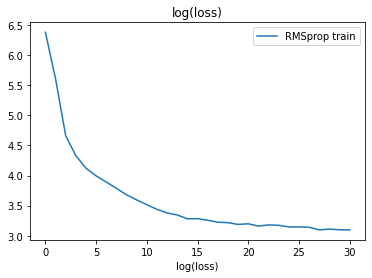

In [65]:
# число рабочих эпох
epochs = 30
# вектор для выводв результатов
epoch = np.arange(epochs+1)

x_input = keras.layers.Input(shape=(13))
x = keras.layers.Dense(128, activation='relu')(x_input)
x_output = keras.layers.Dense(1)(x)
model = keras.models.Model(x_input, x_output)

model.compile(optimizer=keras.optimizers.RMSprop(),
              loss='mse',
              metrics=['mae'])

# вычисляем ошибку для modeli без обучения
hh0_tr = model.evaluate(X_train, y_train,verbose = 0)

# проводим обучение модели 
hh = model.fit(X_train, y_train, epochs=epochs, batch_size=1, verbose=0)

# картинки
plt.plot(epoch,np.log([hh0_tr[0]]+hh.history['loss']),'-',label = model.optimizer.get_config()['name']+' train')

plt.legend()
plt.title('log(loss)')
plt.xlabel('epoch')
plt.xlabel('log(loss)')
plt.show()

Зачем прибавлять ошибку до обучения?

In [66]:
model.evaluate(X_train, y_train)

12/12 [==============================] - 0s 2ms/step - loss: 21.1677 - mae: 3.1248


[21.167688369750977, 3.1248466968536377]

In [67]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 16.4113 - mae: 2.8887


[16.411325454711914, 2.8887195587158203]

In [68]:
y_pred = model.predict(X_test)

In [69]:
d = pd.DataFrame()
d['test'] = y_test
d['pred'] = y_pred
d.head()

,test,pred
0,37.3,33.019367
1,18.3,19.020752
2,19.4,18.405382
3,16.3,12.115879
4,23.8,24.163319


In [70]:
r2_score(y_test, y_pred)

0.7645852679406056